In [5]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np
import cv2

normalize = lambda data: (data-np.min(data))/(np.max(data)-np.min(data))
distribute = lambda data: (data-np.min(data))/(np.max(data)-np.min(data))*2 -1

#import image
BGR_pic = cv2.imread('pcb.jpg')
pic = cv2.cvtColor(BGR_pic, cv2.COLOR_BGR2RGB)
bw_pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)


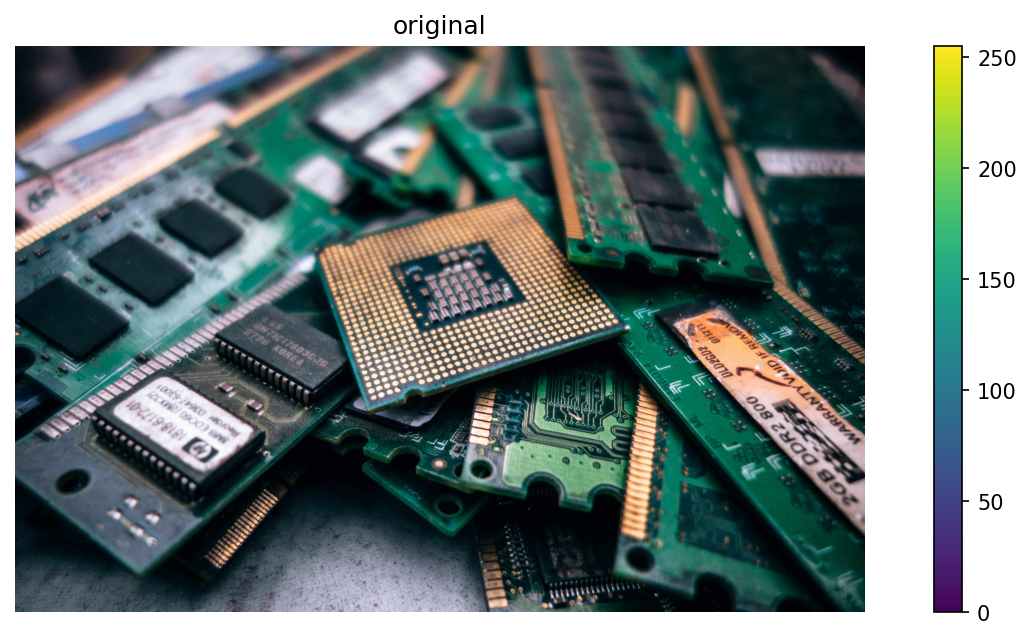

In [6]:
#plot original
fig = plt.figure(figsize=(12,5), dpi=150)
plt.subplot(1,1,1)
plt.imshow(pic)
plt.colorbar()
plt.title('original')
plt.axis('off')
plt.show()

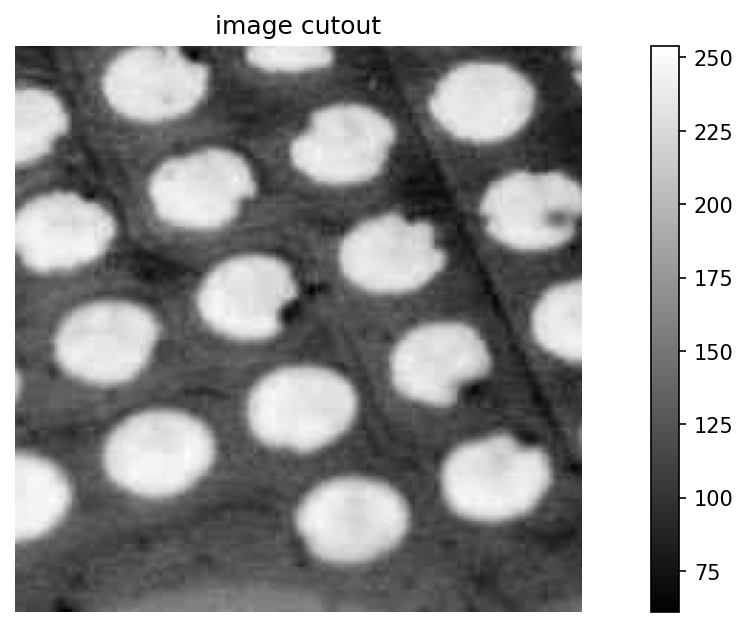

In [7]:
cutout=bw_pic[2000:2200,2500:2700]

#plot cutout
fig = plt.figure(figsize=(12,5), dpi=150)
plt.subplot(1,1,1)
plt.imshow(cutout, cmap='gray')
plt.colorbar()
plt.title('image cutout')
plt.axis('off')
plt.show()

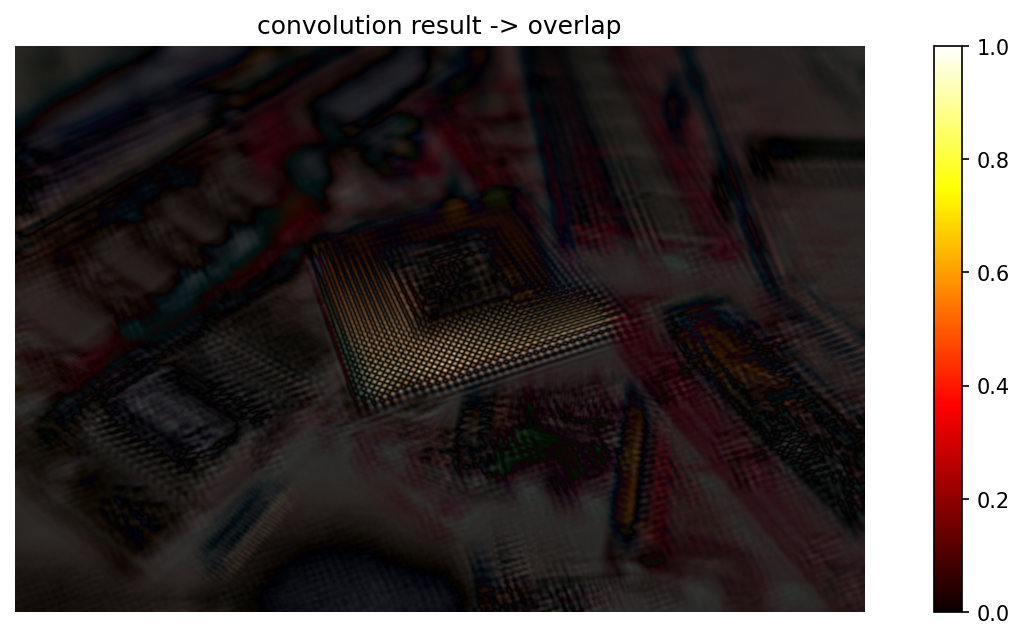

In [8]:
#scale image and compute convolution
pic = distribute(pic)
cutout = distribute(cutout)
heatmap = cv2.filter2D(pic,-1,cutout)
heatmap = normalize(np.abs(heatmap))

#plot heatmap
fig = plt.figure(figsize=(12,5), dpi=150)
plt.subplot(1,1,1)
plt.imshow(heatmap, cmap='hot')
plt.colorbar()
plt.title('convolution result -> overlap')
plt.axis('off')
plt.show()

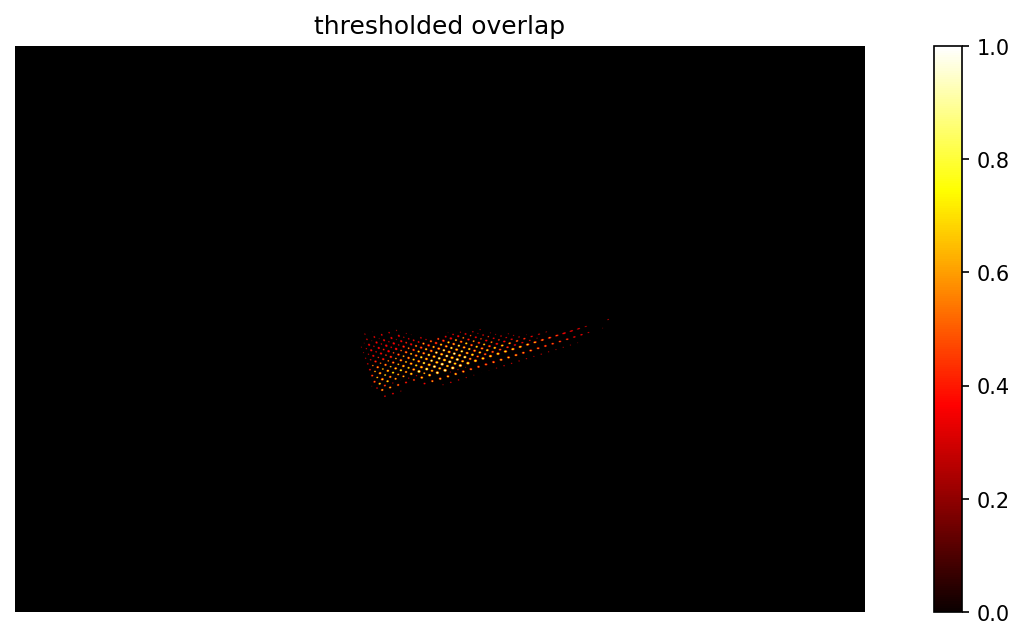

In [9]:
#thresholding
mask = heatmap>0.5
mask = mask.astype(float)
#heatmap = heatmap * mask

#plot heatmap
fig = plt.figure(figsize=(12,5), dpi=150)
plt.subplot(1,1,1)
plt.imshow(mask, cmap='hot')
plt.colorbar()
plt.title('thresholded overlap')
plt.axis('off')
plt.show()